In [2]:
from skimage import io                    # utilities to read and write images in various formats
import numpy as np                        # array manipulation package
import matplotlib.pylab as plt            # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)  # set default figure size
plt.rcParams['image.cmap'] = 'gray'       # set default colormap to gray

# Digital Image Processing - Programming Assignment \#2

The following progamming assignment involves image filtering tasks in frequency domain. The deadline for returning your work is **10 November 2018 at 23:59. Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember list all your sources under references.

If you experience problems that you cannot solve using the course material, including the provided pre-tutorials, or related Python documentation, or have any questions regarding to the programming assignments in general, please **do not hesitate to contact the course assistant** by e-mail at address `Soumya Sara John <soumyasara100@gmail.com>
` or by visiting the office /lab. 

**At first, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s):** Samvram Sahu
* **Contact information:** samvram.iist@gmail.com

# 3. Image transforms - lowpass and highpass filtering in frequency domain

In the following, you will first perform ideal lowpass and highpass filtering on the test image, and later also Gaussian lowpass and highpass filtering. First, read the part concerning image enhancement in frequency domain in the lecture notes or in the course book.

Now, perform the following operations in the reserved code cells and answer to the questions written in bold into the reserved spaces.

**3.1. Read and display the test image `hplptest.jpg`.**

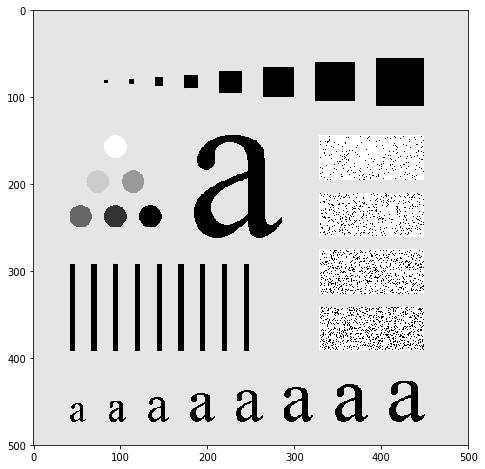

In [3]:
# read test image
hlp = io.imread('hplptest.jpg')

# display the test image
plt.imshow(hlp)

**3.2. Compute the Fourier transform (FT) of the test image using __[`scipy.fftpack.fft2()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft2.html#scipy.fftpack.fft2)__ function and translate the origin (i.e. low frequencies) of the transformed image to the center of the image
using the __[`scipy.fftpack.fftshift()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftshift.html#scipy.fftpack.fftshift)__ function after FT. Then, take a look at what the magnitude of the uncentered and centered FT looks like by plotting them into the same figure using `imshow()` function.**

Hint: When plotting the FTs, use logarithmic graylevel transformation to make the result more illustrative for human visual system: 

`>>> np.log(np.abs(image_fft)+1)`

Please note that the logarithmic scaling of the magnitude of the FT should be use only for visualization purposes. In the following, filtering tasks should be applied on the original FT!

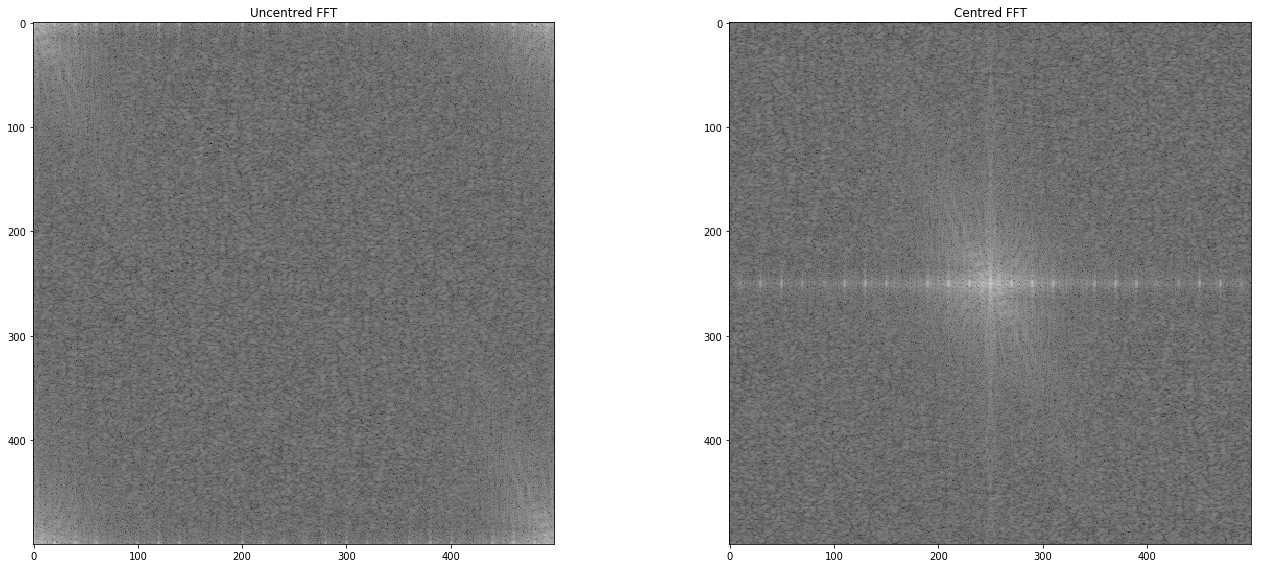

In [4]:
from scipy import fftpack

# compute the FT of the test image using 'fftpack.fft2' and its default parameters
hlp_fft = fftpack.fft2(hlp)

# translate the origin of the FT (low frequencies) to the center using 'fftpack.fftshift'
hlp_fft_shift = fftpack.fftshift(hlp_fft)

# display the magnitude of the uncentered and centered FT in the same figure using 'imshow'
fig, ax = plt.subplots(1,2)

ax[0].imshow(np.log(np.abs(hlp_fft)+1))
ax[0].set_title('Uncentred FFT')

ax[1].imshow(np.log(np.abs(hlp_fft_shift)+1))
ax[1].set_title('Centred FFT')

fig.tight_layout()

**The code for constructing a ideal lowpass filter is given below:**

Hint: Print the help variables if you cannot tell what they represent just by looking at the code.

In [5]:
# make two frequency matrices, 'f1' and 'f2', as help variables (frequencies from -1 to almost 1)
n = (500,500) # same size as the fft2 of the test image
f1 = ( np.arange(0,n[0])-np.floor(n[0]/2) ) * (2./(n[0]))
f2 = ( np.arange(0,n[1])-np.floor(n[1]/2) ) * (2./(n[1]))
f1, f2 = np.meshgrid(f1, f2)

# make a matrix 'D' with absolute frequency values (“sampled” frequency domain)
# where zero-frequency is at D[250,250] and the other values correspond to the absolute distance from it
D = np.sqrt(f1**2 + f2**2)

# set cut-off frequency 'D0' to 0.2
D0 = 0.2;

# initialize filter matrix 'Hlp' with ones (same size as the fft2 of the test image)
Hlp = np.ones(n)

# set frequencies in filter mask 'Hlp' greater than the cut-off frequency 'D0' to zero
# other elements remain unaltered
Hlp[D>D0] = 0.0

**3.3. Modify the lowpass filter code and construct ideal highpass filter `Hhp` with the same cut-off frequency `D0=0.2`. Then, display both ideal lowpass and highpass filter masks in the same figure.**

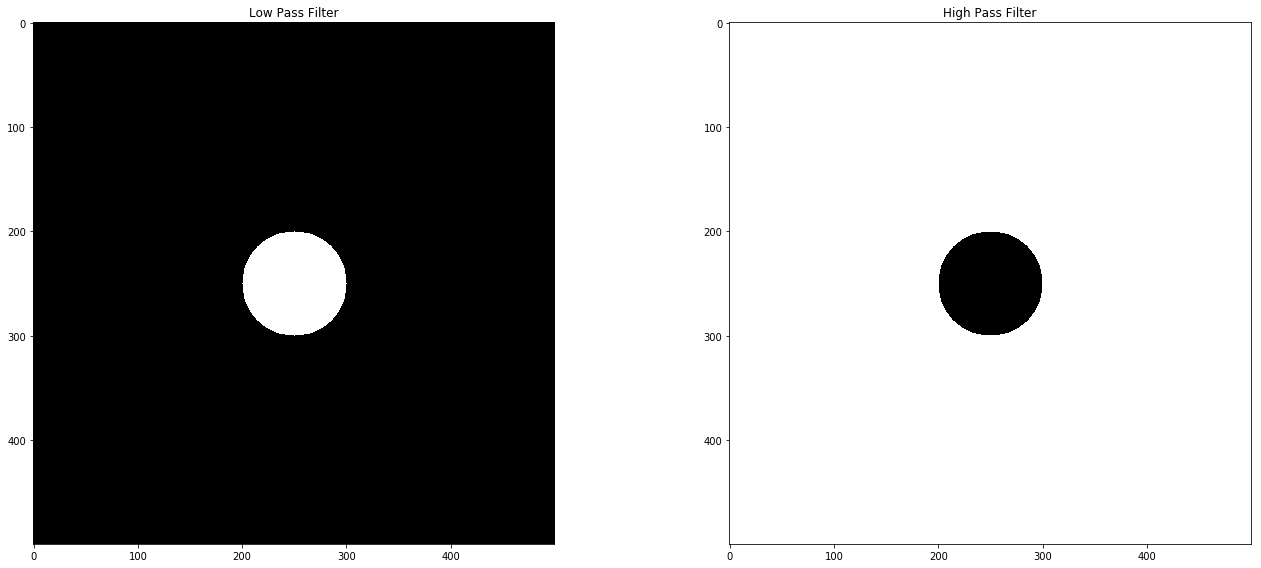

In [6]:
# create ideal highpass filter mask 'Hhp'
Hhp = np.ones(n)

# set frequencies in filter mask 'Hhp' below the cut-off frequency 'D0' to zero
Hhp[D<D0] = 0.0

# display the filter masks 'Hlp' and 'Hhp' in the same figure
fig, ax = plt.subplots(1,2)

ax[0].imshow(Hlp)
ax[0].set_title('Low Pass Filter')

ax[1].imshow(Hhp)
ax[1].set_title('High Pass Filter')

fig.tight_layout()

**3.4. Perform ideal lowpass and highpass filtering in the frequency domain separately to the test image by multiplying the centralized FT of the original image with the `Hlp` and `Hhp` filter masks (element-per-element matrix multiplication). Then, display the magnitude of the two resulting FTs in the same figure.**

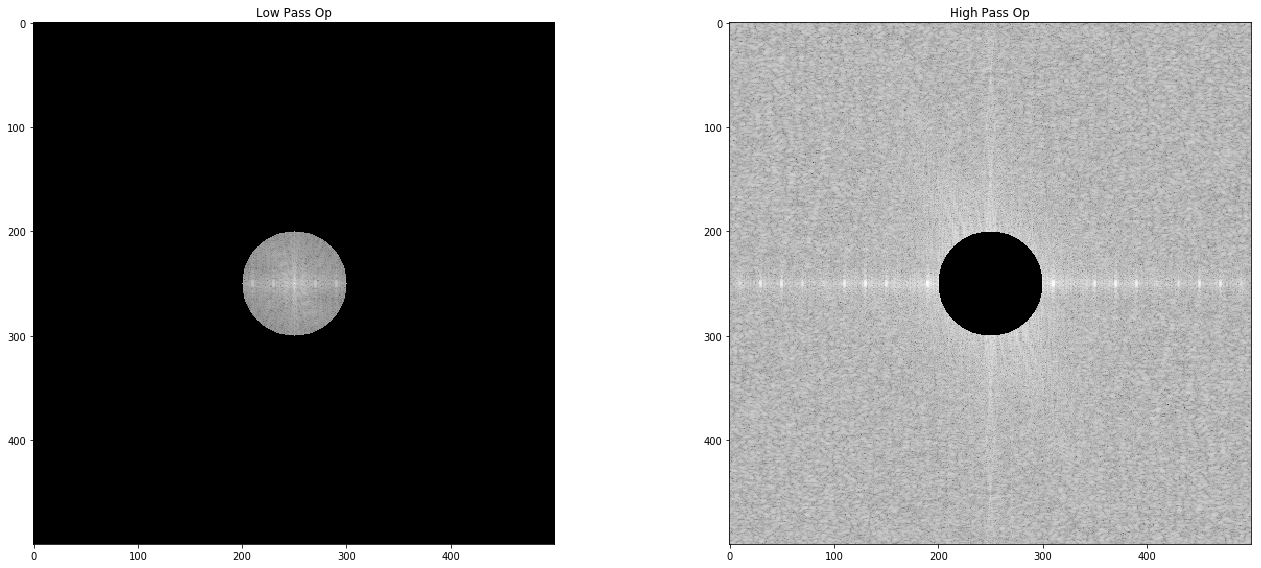

In [10]:
# apply ideal lowpass and highpass filtering separately to the test image
# i.e. perform element-wise multiplication to the FT of the image with the filter masks
hlp_lp_fft_shift = np.multiply(hlp_fft_shift, Hlp)
hlp_hp_fft_shift = np.multiply(hlp_fft_shift, Hhp)

# display the magnitude of the resulting FTs
fig, ax = plt.subplots(1,2)

ax[0].imshow(np.log(np.abs(hlp_lp_fft_shift)+1))
ax[0].set_title('Low Pass Op')

ax[1].imshow(np.log(np.abs(hlp_hp_fft_shift)+1))
ax[1].set_title('High Pass Op')

fig.tight_layout()

**3.5. Reconstruct the filtered images with __[`fftpack.ifft2()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.ifft2.html#scipy.fftpack.ifft2)__ and __[`fftpack.ifftshift()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.ifftshift.html#scipy.fftpack.ifftshift)__ in reverse order. Then, display the original image and the two filtered images using `imshow()` in the same figure.** 

Hint: Due to possible round-off errors, you have to __[take the real part](https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.real.html#numpy.real)__ of the resulting inverse FT before displaying it with `imshow()`. Please note also that the resulting images contain values beyond the original `uint8` image `[0,255]`, so you need to saturate these values using __[`np.clip()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.clip.html#numpy.clip)__ before visualization (you can test what the reconstructed images look like without clipping).

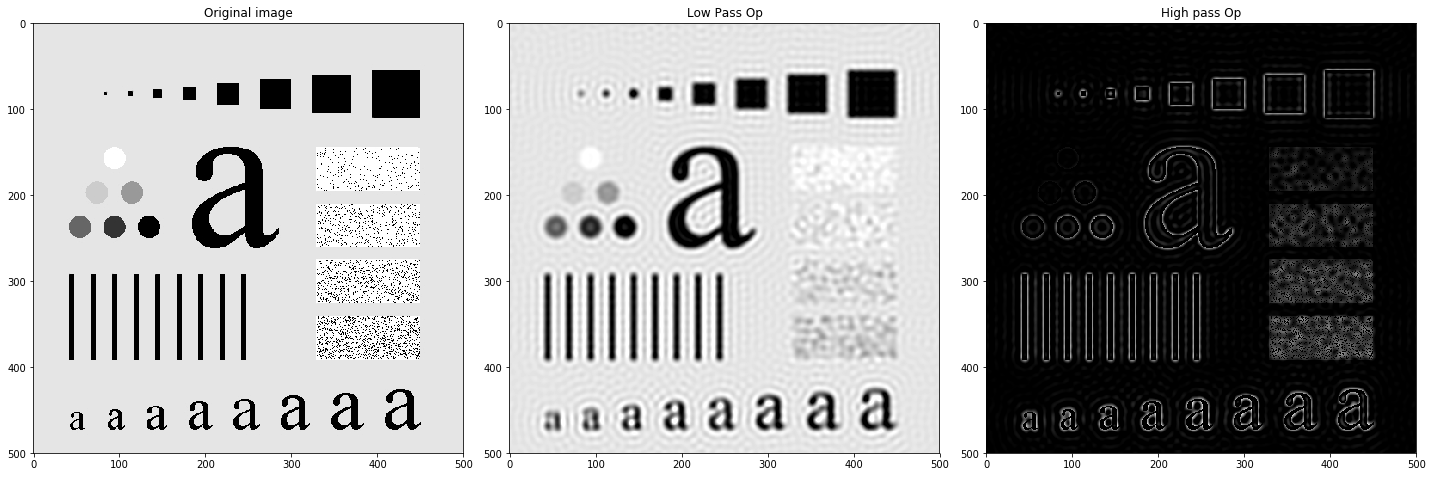

In [23]:
# reconstruct the filtered images
hlp_lp = fftpack.ifft2(fftpack.ifftshift(hlp_lp_fft_shift))
hlp_hp = fftpack.ifft2(fftpack.ifftshift(hlp_hp_fft_shift))

# take the 'real' part of the resulting images due to possible round-off errors
hlp_lp = np.real(hlp_lp)
hlp_hp = np.real(hlp_hp)

# clip (saturate) values beyond the uint8 range [0,255] 
hlp_lp = np.clip(hlp_lp, 0, 255)
hlp_hp = np.clip(hlp_hp, 0, 255)

# display the original image and its lowpass and highpass filtered images in the same figure
fig,ax = plt.subplots(1,3)

ax[0].imshow(hlp)
ax[0].set_title('Original image')

ax[1].imshow(hlp_lp)
ax[1].set_title('Low Pass Op')

ax[2].imshow(hlp_hp)
ax[2].set_title('High pass Op')

fig.tight_layout()

When performing ideal lowpass and highpass filtering, unwanted artefacts appear to the filtered image. **What is this phenomenon called and why does it occur?**

An ideal filter results in ringing artifacts via the Gibbs phenomenon. Ideal filters are impossible to realize without having signals of infinite extent, and so generally needs to be approximated for real ongoing signals, because the sinc function's support region extends to all past and future times. The filter would therefore need to have infinite delay, or knowledge of the infinite future and past, in order to perform convolution


**3.6. Next, construct Gaussian lowpass and highpass filters (`Hlpg` and `Hhpg`) with cut-off frequency `D0=0.2` and display them in the same figure.**

Hint: All you need to do is to modify the filter matrix `Hlp` and `Hhp` related lines in the ideal lowpass and highpass filter code snippets accordingly with help of frequency matrix `D` to form `Hlpg` and `Hhpg` (see, formula 4.3-7 course book or lecture notes).

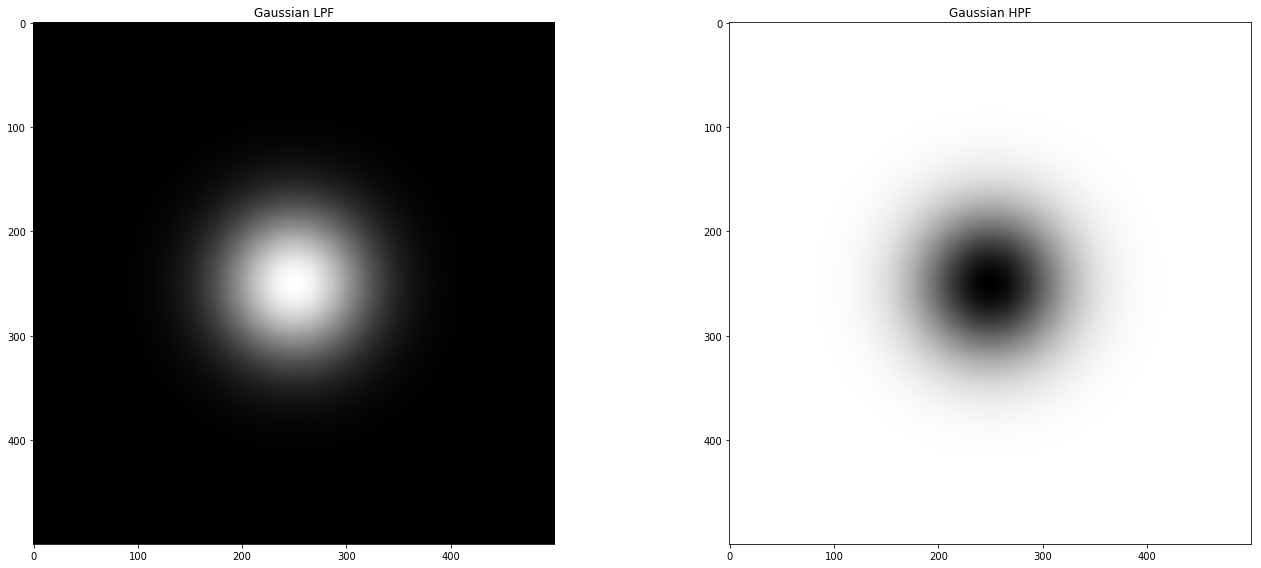

In [20]:
# construct Gaussian lowpass and highpass filters
Hlp_gaussian = np.exp(-np.square(D)/(2*D0**2))
Hhp_gaussian = 1 -Hlp_gaussian

# display the filter masks in the same figure
fig, ax = plt.subplots(1,2)

ax[0].imshow(Hlp_gaussian)
ax[0].set_title('Gaussian LPF')

ax[1].imshow(Hhp_gaussian)
ax[1].set_title('Gaussian HPF')

fig.tight_layout()

**3.7. Perform Gaussian lowpass and highpass filtering separately to the original test image and display the magnitude of the resulting FTs in the same figure.**

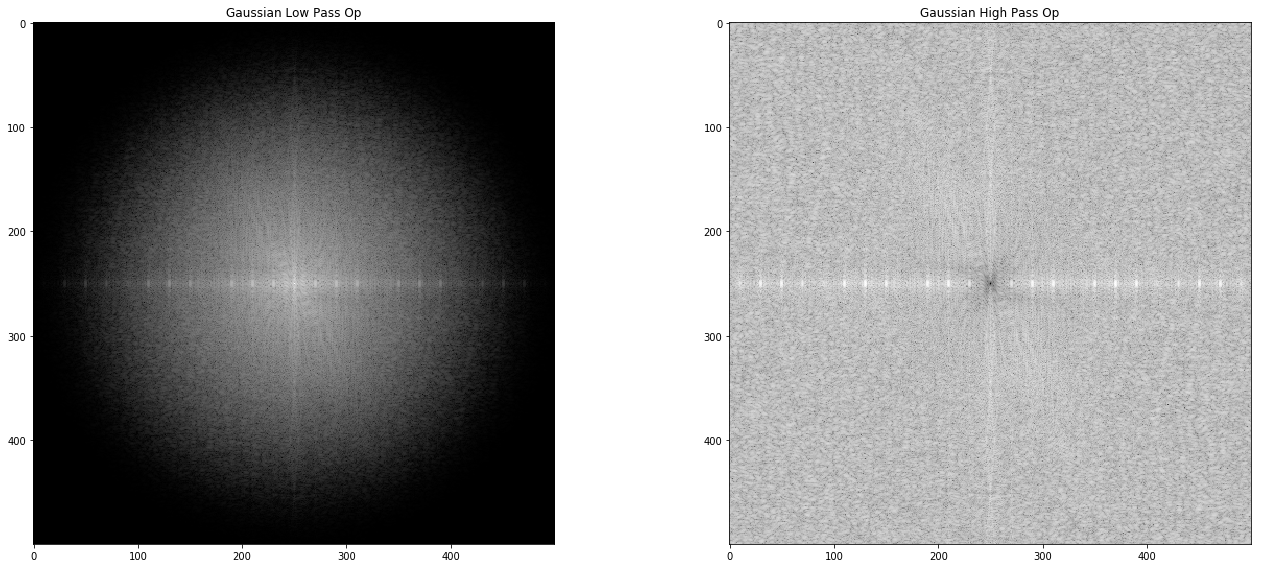

In [21]:
# apply gaussian lowpass and highpass filtering to the test image
hlp_lpf_gau_fft = np.multiply(hlp_fft_shift, Hlp_gaussian)
hlp_hpf_gau_fft = np.multiply(hlp_fft_shift, Hhp_gaussian)

# display the magnitude of the resulting FTs in the same figure
fig, ax = plt.subplots(1,2)

ax[0].imshow(np.log(np.abs(hlp_lpf_gau_fft)+1))
ax[0].set_title('Gaussian Low Pass Op')

ax[1].imshow(np.log(np.abs(hlp_hpf_gau_fft)+1))
ax[1].set_title('Gaussian High Pass Op')

fig.tight_layout()

**3.8. Finally, reconstruct the filtered images just like in step 3.5. and display the original image and the two Gaussian filtered images in the same figure.**

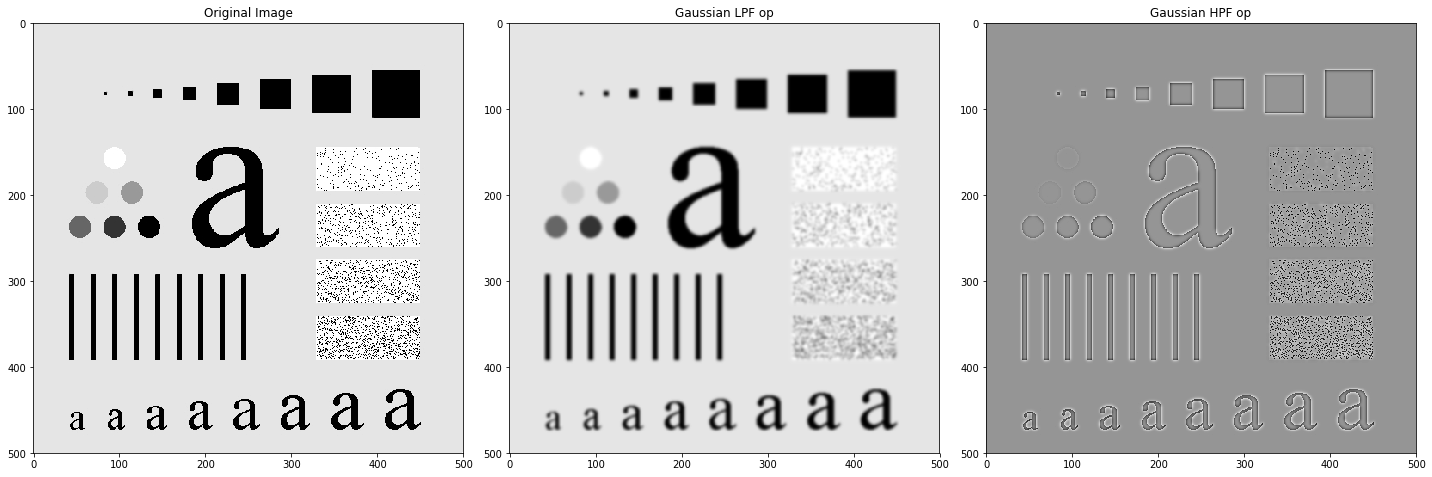

In [25]:
# reconstruct the Gaussian filtered images 
hlp_lp_g = fftpack.ifft2(fftpack.ifftshift(hlp_lpf_gau_fft))
hlp_hp_g = fftpack.ifft2(fftpack.ifftshift(hlp_hpf_gau_fft))

# take the 'real' part of the resulting images due to possible round-off errors
hlp_lp_g = np.real(hlp_lp_g)
hlp_hp_g = np.real(hlp_hp_g)

# clip (saturate) values beyond the uint8 range [0,255] 
hlp_lp_g = np.clip(hlp_lp_g, 0, 255)
hlp_hp_G = np.clip(hlp_hp_g, 0, 255)

# display the original image and its Gaussian lowpass and highpass filtered images in the same figure
fig, ax = plt.subplots(1,3)

ax[0].imshow(hlp)
ax[0].set_title('Original Image')

ax[1].imshow(hlp_lp_g)
ax[1].set_title('Gaussian LPF op')

ax[2].imshow(hlp_hp_g)
ax[2].set_title('Gaussian HPF op')

fig.tight_layout()

**Do the unwanted artefacts appear in the Gaussian lowpass filtered image? Why or why not?**

No, not any ringing artefacts have been observed in the case of Gaussian filtering as there is no abrupt edge in the frequency domain and hence the resulting image is smooth.

**What kind of effect does Gaussian (and ideal) lowpass filtering have on images in general? Why? What about highpass filtering? Why?**

Gaussian LPF blurs the image but there is no ringing, where as high pass filter only provides features at edges or where there is an abrupt change.

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

1 Hour

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

It was enlightening

# References
Same as previous assignment.

# Submission

1. Click on the menu `Kernel -> Restart & Clear Output` to clear all outputs and variables, etc.
2. Compress the resulting Jupyter notebook (`DIP_PA2.ipynb` file) into **`DIP_PA2_[student number(s)].zip`** (e.g. `DIP_PA2_1234567.zip` if solo work or `DIP_PA2_1234567-7654321.zip` if pair work).